In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open("./data/train_data_final.pkl", "rb") as f:
    loaded_data = pd.read_pickle(f)

df = loaded_data[0]
print("\nA Dataframe with", len(df), "entries has been loaded")


A Dataframe with 97417 entries has been loaded


In [3]:
df.columns

Index(['Date', 'Local Time Of Day', 'Locale Reference', 'State Reference',
       'Relative Position.Angle.Radial',
       'Relative Position.Distance.Nautical Miles',
       'Altitude.AGL.Single Value', 'Altitude.MSL.Single Value',
       'Flight Conditions', 'Weather Elements / Visibility',
       'Work Environment Factor', 'Light', 'Ceiling', 'RVR.Single Value',
       'ATC / Advisory', 'Aircraft Operator', 'Make Model Name',
       'Aircraft Zone', 'Crew Size', 'Operating Under FAR Part', 'Flight Plan',
       'Mission', 'Nav In Use', 'Flight Phase', 'Route In Use', 'Airspace',
       'Maintenance Status.Maintenance Deferred',
       'Maintenance Status.Records Complete',
       'Maintenance Status.Released For Service',
       'Maintenance Status.Required / Correct Doc On Board',
       'Maintenance Status.Maintenance Type',
       'Maintenance Status.Maintenance Items Involved', 'Cabin Lighting',
       'Number Of Seats.Number', 'Passengers On Board.Number',
       'Crew Size Fli

In [9]:
df.head()

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,Weather Elements / Visibility,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Year
ACN,,,,,,,,,,,,,,,,,,,,,
1163382,201404,1201-1800,ZZZ.Airport,US,NaN,NaN,0.0,NaN,VMC,NaN,...,In-flight,Flight Crew Returned To Gate; Flight Crew Reje...,Aircraft; Environment - Non Weather Related; P...,Environment - Non Weather Related,I was the pilot flying performing the takeoff....,NaN,At approximately 75 KTS I glanced at my airspe...,NaN,A B767 Captain; the pilot not flying; rejected...,2014
893734,201006,1801-2400,SFO.Airport,CA,NaN,NaN,0.0,NaN,NaN,NaN,...,Pre-flight,General None Reported / Taken,Human Factors,Human Factors,We had 6 shipments of dry ice for the flight; ...,NaN,NaN,NaN,A B767-300 Pilot reported his Dangerous Goods ...,2010
991883,201201,0601-1200,EGLL.Airport,FO,NaN,NaN,NaN,4000.0,NaN,NaN,...,In-flight,General None Reported / Taken,Procedure; Company Policy; Human Factors; Manuals,Company Policy,I have seen a lot of mistakes on every flight ...,NaN,NaN,NaN,The Captain of an international flight crew re...,2012
1590076,201810,0001-0600,EUG.Airport,OR,NaN,NaN,NaN,3900.0,VMC,NaN,...,In-flight,Flight Crew Took Evasive Action,Human Factors; Procedure,Ambiguous,It was my first time flying into KEUG and I wa...,NaN,Night VMC visual approach left base leg into E...,NaN,Air carrier flight crew reported receiving a T...,2018
1715282,202001,1801-2400,MDW.Airport,IL,NaN,5.0,NaN,2000.0,NaN,NaN,...,In-flight,General None Reported / Taken,Procedure,Procedure,I am writing this report to bring attention to...,NaN,NaN,NaN,Air Carrier First Officer reported that the us...,2020


In [10]:
Narrative =  df['Narrative']
Narrative

ACN
1163382    I was the pilot flying performing the takeoff....
893734     We had 6 shipments of dry ice for the flight; ...
991883     I have seen a lot of mistakes on every flight ...
1590076    It was my first time flying into KEUG and I wa...
1715282    I am writing this report to bring attention to...
                                 ...                        
622204     WE WERE ENRTE IN LNAV AT FL310; 30 MI N OF ATL...
622205     CLRED BY TWR CTL TO CROSS RWY 8R/26L AT TXWY E...
661202     WHILE WORKING NUMEROUS CVG AND CMH DEPS AT A C...
733747     ON MIDNIGHT SHIFT; APPROX XA00 LCL TIME; 2 SEC...
874642     I was working the FD/CD (Flight Data/Clearance...
Name: Narrative, Length: 97417, dtype: object

In [11]:
# Check the length of the first narrative

first_narrative = Narrative.iloc[0]
print(first_narrative)
stem = first_narrative.split()
print(len(stem))

I was the pilot flying performing the takeoff. During the takeoff roll the Captain called '80 KTS' and then leaned forward and deactivated the autobrakes from 'RTO' to 'OFF' and stated 'My Aircraft' 'Aborting Takeoff'. The Captain then closed the throttles; moved them into 'REV' and spoilers deployed. I noted 110 KTS on the airspeed ribbon and held the yoke forward; called deployed and no autobrakes. I inform the Tower that we were aborting the takeoff. The Captain stated that during airspeed crosscheck he noted that the standby airspeed indicated had not moved off its parked position of 30 KTS. The deceleration was very gentle and there appeared to be; and felt as if no heavy braking if any braking was taking place. The Captain said that he was not using brakes or very little braking. We rolled to end of the runway and exited.The Tower asked if we needed assistance and the Captain said no. On exiting the runway; I informed Ground that we will be returning to the gate and they too aske

In [12]:
targets = df['Anomaly']
targets

ACN
1163382    Aircraft Equipment Problem Critical; Deviation...
893734     Deviation / Discrepancy - Procedural Hazardous...
991883     Deviation / Discrepancy - Procedural Published...
1590076               Inflight Event / Encounter CFTT / CFIT
1715282                                  ATC Issue All Types
                                 ...                        
622204     ATC Issue All Types; Conflict Airborne Conflic...
622205     Conflict Ground Conflict; Critical; Ground Inc...
661202       ATC Issue All Types; Conflict Airborne Conflict
733747                                    Other ATOP Failure
874642     Deviation - Track / Heading All Types; Deviati...
Name: Anomaly, Length: 97417, dtype: object

In [13]:
# Check the labels of the first target
first_target = targets.iloc[0]
print(first_target)
print('List from of first target: ', first_target.split(';'))


Aircraft Equipment Problem Critical; Deviation / Discrepancy - Procedural Published Material / Policy
List from of first target:  ['Aircraft Equipment Problem Critical', ' Deviation / Discrepancy - Procedural Published Material / Policy']


In [14]:
# Identifying columns that appear to be narrative fields
narrative_columns = [col for col in df.columns if 'Narrative' in col]

# Filter out the narrative columns for analysis
narrative_data = df[narrative_columns]

# Display the filtered narrative columns and their first few entries
narrative_data.head()


,Narrative,Narrative.1
ACN,,
1163382,I was the pilot flying performing the takeoff....,At approximately 75 KTS I glanced at my airspe...
893734,We had 6 shipments of dry ice for the flight; ...,NaN
991883,I have seen a lot of mistakes on every flight ...,NaN
1590076,It was my first time flying into KEUG and I wa...,Night VMC visual approach left base leg into E...
1715282,I am writing this report to bring attention to...,NaN


In [11]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
numerical_stats


,Date,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.MSL.Single Value,Crew Size,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Aircraft Zone.1,Crew Size.1,Maintenance Status.Records Complete.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,ASRS Report Number.Accession Number,ASRS Report Number.Accession Number.1,Year
count,97417.000000,5607.000000,25536.000000,44861.000000,88946.000000,539.000000,454.000000,123.000000,0.0,13223.000000,0.0,6.000000,4.000000,0.0,9.710500e+04,2.261100e+04,97417.000000
mean,201039.129454,183.810675,14.761879,12770.632993,1.831808,157.727273,121.865639,5.097561,NaN,1.635257,NaN,161.000000,145.250000,NaN,1.094300e+06,3.611242e+07,2010.407475
std,1404.400330,105.563691,60.652496,12703.407587,0.487287,57.022576,67.950521,3.514407,NaN,0.537635,NaN,90.015554,45.748406,NaN,2.286210e+07,5.223520e+09,5.878621
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,3.000000,100.000000,NaN,7.000000e+00,1.000000e+00,2002.000000
25%,200511.000000,90.000000,0.000000,3000.000000,2.000000,129.000000,75.000000,3.000000,NaN,1.000000,NaN,140.750000,117.250000,NaN,6.784750e+05,6.988770e+05,2005.000000
50%,201002.000000,180.000000,3.000000,7000.000000,2.000000,150.000000,129.000000,4.000000,NaN,2.000000,NaN,176.500000,137.500000,NaN,8.777480e+05,9.201440e+05,2010.000000
75%,201601.000000,270.000000,13.000000,22000.000000,2.000000,188.000000,173.500000,6.000000,NaN,2.000000,NaN,204.750000,165.500000,NaN,1.329844e+06,1.340026e+06,2016.000000
max,202201.000000,360.555550,5000.000000,340000.000000,10.000000,436.000000,350.000000,20.000000,NaN,10.000000,NaN,267.000000,206.000000,NaN,7.080881e+09,7.854348e+11,2022.000000


In [12]:
# Count of missing values in each column
missing_values = df.isnull().sum()
pd.DataFrame(missing_values).T  

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,Weather Elements / Visibility,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Year
0,0,7866,813,0,91810,71881,57059,52556,34730,69196,...,48842,3971,402,406,0,95409,85125,97264,11,0


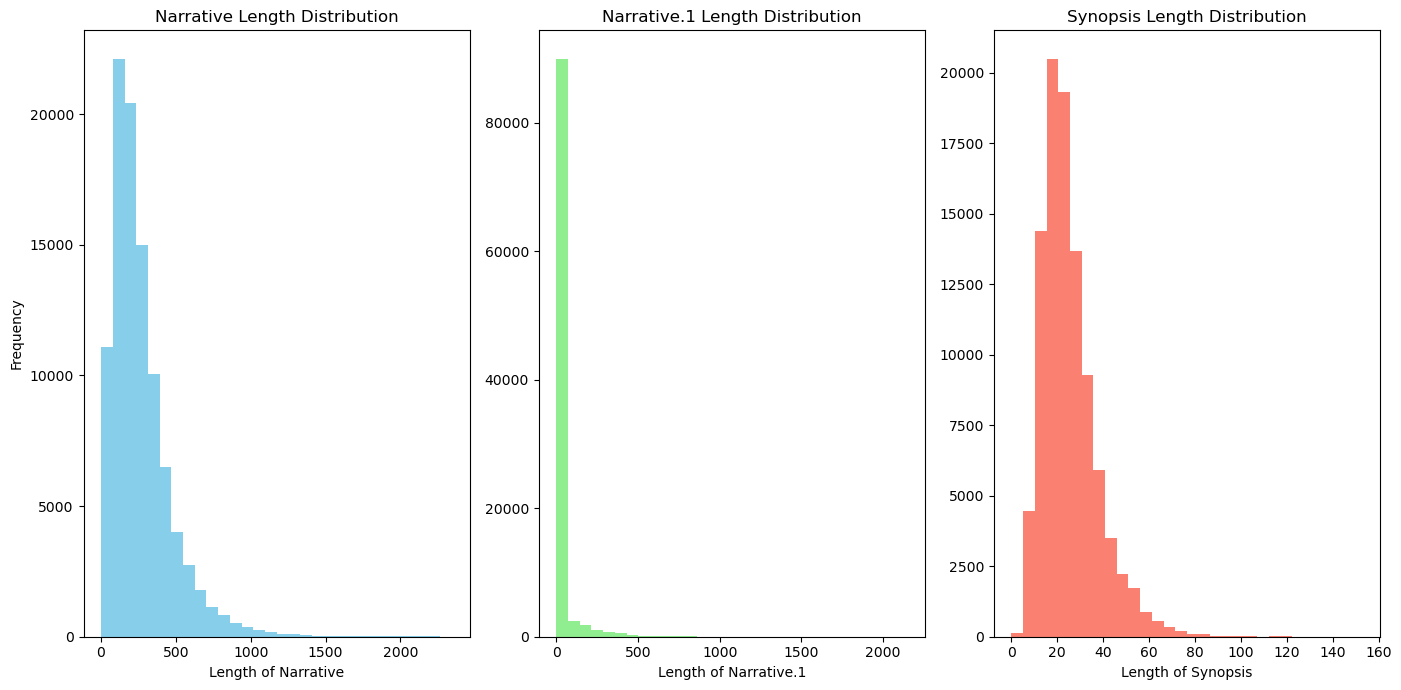

In [13]:
import matplotlib.pyplot as plt

# Calculate the length of each narrative entry
narrative_lengths = narrative_data.applymap(lambda text: len(str(text).split()) if pd.notnull(text) else 0)

# Plotting the distribution of narrative lengths
plt.figure(figsize=(14, 7))

# Plotting the length of 'Narrative'
plt.subplot(1, 3, 1)
plt.hist(narrative_lengths['Narrative'], bins=30, color='skyblue')
plt.title('Narrative Length Distribution')
plt.xlabel('Length of Narrative')
plt.ylabel('Frequency')

# Plotting the length of 'Narrative.1'
plt.subplot(1, 3, 2)
plt.hist(narrative_lengths['Narrative.1'], bins=30, color='lightgreen')
plt.title('Narrative.1 Length Distribution')
plt.xlabel('Length of Narrative.1')

# Plotting the length of 'Synopsis'
plt.subplot(1, 3, 3)
plt.hist(narrative_lengths['Synopsis'], bins=30, color='salmon')
plt.title('Synopsis Length Distribution')
plt.xlabel('Length of Synopsis')

plt.tight_layout()
plt.show()


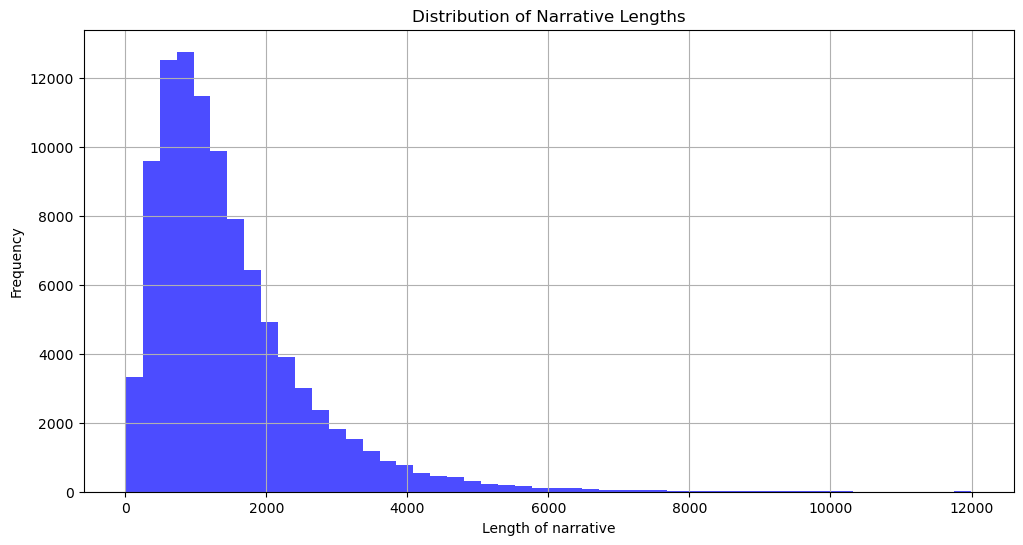

count    97417.000000
mean      1468.963785
std       1129.507587
min          8.000000
25%        707.000000
50%       1187.000000
75%       1895.000000
max      11998.000000
Name: Narrative, dtype: float64

In [14]:
# Calculate the length of each narrative
narrative_lengths = df['Narrative'].dropna().apply(len)

# Plot the distribution of narrative lengths
plt.figure(figsize=(12, 6))
plt.hist(narrative_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Length of narrative')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Basic statistics of narrative lengths
narrative_lengths.describe()

Token indices sequence length is longer than the specified maximum sequence length for this model (4291 > 4096). Running this sequence through the model will result in indexing errors


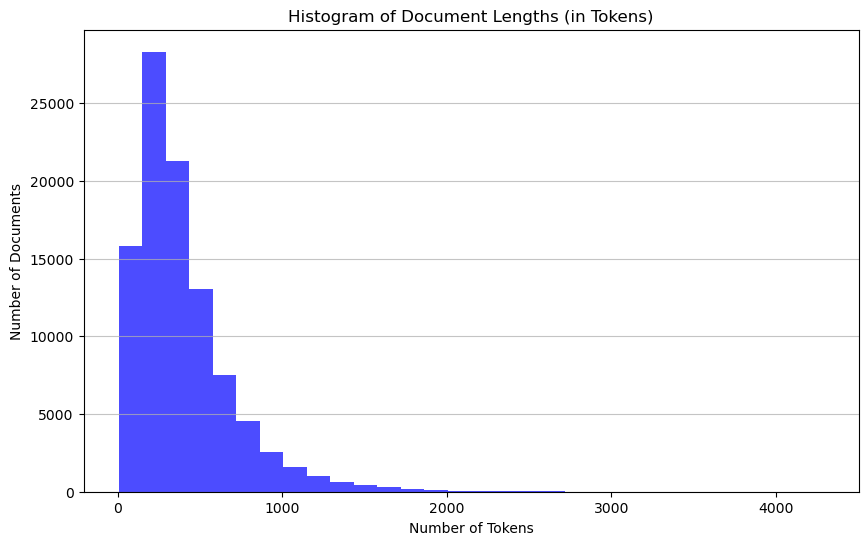

In [6]:
from transformers import LongformerTokenizer
import matplotlib.pyplot as plt

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
documents = df['Narrative']

num_tokens = []

# Iterate over documents and print the number of tokens along with the index
for index, doc in enumerate(documents):
    num = len(tokenizer.encode(doc, add_special_tokens=True))
    num_tokens.append(num)
    # print(f"Document {index} contains {num} tokens")


# Create a histogram of the number of tokens
plt.figure(figsize=(10, 6))
plt.hist(num_tokens, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Document Lengths (in Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Documents')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [34]:
from collections import Counter

narratives = df['Narrative']

# Split the narratives into individual words and flatten the list
narratives.str.split().explode()

In [15]:
from collections import Counter

narratives = df['Narrative']

# Split the narratives into individual words and flatten the list
words = narratives.str.split().explode()

# Count the frequency of each word
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
most_common_words


[('the', 1002792),
 ('THE', 736790),
 ('I', 600609),
 ('to', 578605),
 ('and', 497578),
 ('TO', 396555),
 ('AND', 326530),
 ('was', 293387),
 ('a', 268287),
 ('of', 228102),
 ('WAS', 213531),
 ('A', 191266),
 ('that', 182379),
 ('we', 166070),
 ('on', 162369),
 ('OF', 162296),
 ('in', 160661),
 ('WE', 158041),
 ('for', 130389),
 ('THAT', 126980)]

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Download the set of stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to remove stopwords and punctuation
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply the clean_text function to each narrative entry
narrative_data['Narrative_clean'] = narrative_data['Narrative'].dropna().apply(clean_text)
narrative_data['Narrative.1_clean'] = narrative_data['Narrative.1'].dropna().apply(clean_text)

# Now let's analyze word frequencies in the clean narratives
from collections import Counter

# Combine all the clean words into one list
all_words = list(narrative_data['Narrative_clean'].dropna().sum()) + list(narrative_data['Narrative.1_clean'].dropna().sum())

# Get the most common words and their counts
word_counts = Counter(all_words).most_common(20)

word_counts


[nltk_data] Downloading package punkt to /home/gonem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gonem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_3000/1373062516.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narrative_data['Narrative_clean'] = narrative_data['Narrative'].dropna().apply(clean_text)


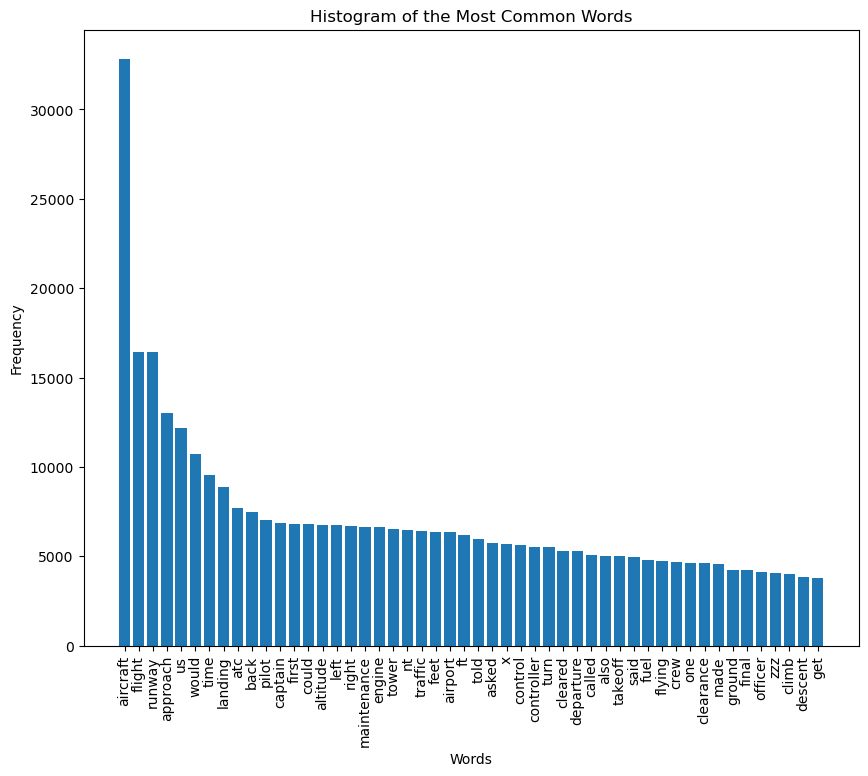

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'most_common_words' is a list of tuples like [('word1', count1), ('word2', count2), ...]

# Separate the words and their counts
words, counts = zip(*Counter(all_words).most_common(50))

# Create the bar chart (which will serve as a histogram for categorical data)
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(words, counts)  # Create a bar chart with words on the x-axis and counts on the y-axis

# Add titles and labels
plt.title('Histogram of the Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them better

# Show the plot
plt.show()


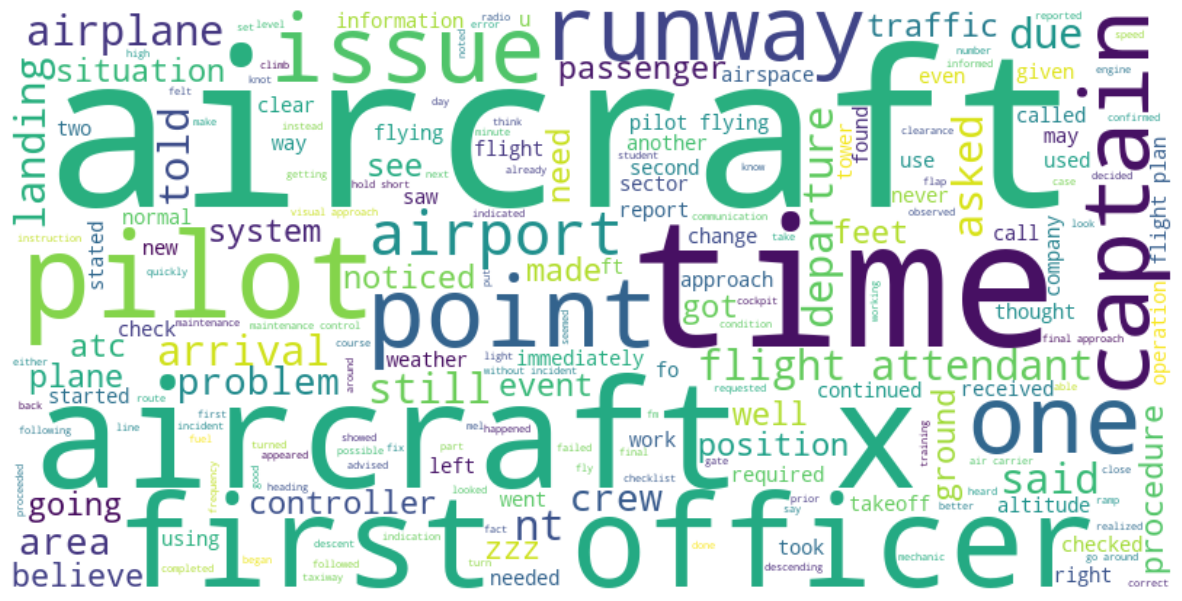

In [ ]:
from wordcloud import WordCloud

# Combine all narratives into one large text
combined_narratives = ' '.join(narrative_data['Narrative_clean'].dropna().sum())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_narratives)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [30]:
# Assuming 'Anomaly' is the correct column name, we will now encode it into a multi-label format
# We will first identify all unique anomalies

# Create a set to hold unique anomalies
unique_anomalies = set()

# Update the set with unique anomalies from each row in the 'Anomaly' column
df['Anomaly'].dropna().apply(lambda x: [item.strip() for item in x.split(';')]).apply(unique_anomalies.update)
sorted(unique_anomalies)

['#1 Eng Vibration',
 '1200. Ctlr handling',
 '1L & 1R Confusing And Absent. Confusion Over Hold Short Area For Rwy 7L.',
 'A/T',
 'ACFT Y',
 'AND COMPANY',
 'AND LANDED AT PRIVATE ARPT',
 'AND SET ALTIMETERS ACCORDINGLY',
 'AND STEALING LIQUOR',
 'AND VOICED NO OBJECTION',
 'AND WING WALKERS',
 'APPROVAL',
 'ARAIN BECAME AIRBORNE',
 'ARPT PLATE PAGES (13) TOO COMPLEX PLATE PAGES NOT CURRENT',
 'AT NIGHT',
 'ATC',
 'ATC Issue All Types',
 'Acft Behind Had Visual With Them',
 'Acft Landed Overwt',
 'Acft Ops Manual',
 'Aircraft Equipment Problem Critical',
 'Aircraft Equipment Problem Less Severe',
 'Airspace Violation All Types',
 'Alt Law',
 'And Had A Prop Strike',
 'And Had Rwy Incursion',
 'And Not Serviced',
 'Arrested',
 'Aural Warning Inop',
 'BROKEN CRANSHAFT.',
 'BURNED OUT',
 'BURP BAGS NOT IN ALL SEAT POCKETS',
 'Biannual Flt Review & Acft Log Books',
 'Briefing',
 'But Acft Was Too Fast To Stop.',
 'But Flew Picture Instead',
 'But Given Verbal Ok',
 'CARGO SMOKE DET. FAILE

In [ ]:
# Now we'll create a DataFrame where each anomaly gets its own column
# Initialize a dictionary where keys are anomalies and values are lists of 0s and 1s
anomaly_encoding = {anomaly: [] for anomaly in unique_anomalies}

# Populate the dictionary with correct encodings for each row
for anomaly_list in df['Anomaly'].dropna().str.split(';'):
    for anomaly in unique_anomalies:
        anomaly_encoding[anomaly].append(int(anomaly in anomaly_list))

# Convert the dictionary to a DataFrame
anomaly_df = pd.DataFrame(anomaly_encoding)

# Show the shape of the new DataFrame and the first few rows to verify the encoding
anomaly_df_shape = anomaly_df.shape
anomaly_df.head()

In [19]:
# Root label (source = ASRS coding forms) : order = by descending frequency
anomaly_labels=['Deviation / Discrepancy - Procedural',
                    'Aircraft Equipment',
                    'Conflict',
                    'Inflight Event / Encounter',
                    'ATC Issue',
                    'Deviation - Altitude',
                    'Deviation - Track / Heading',
                    'Ground Event / Encounter',
                    'Flight Deck / Cabin / Aircraft Event',
                    'Ground Incursion',
                    'Airspace Violation',
                    'Deviation - Speed',
                    'Ground Excursion',
                    'No Specific Anomaly Occurred']

In [21]:
# Function to check prefixes and include 'Other' category
def check_prefixes(anomaly, prefixes):
    split_anomalies = [item.strip() for item in anomaly.split(';')]
    prefix_matches = {prefix: any(item.startswith(prefix) for item in split_anomalies) for prefix in prefixes}
    prefix_matches['Other'] = not any(prefix_matches.values())  # If no prefix matches, this is 'Other'
    return prefix_matches

# Apply this function to each row in the 'Anomaly' column
binary_representation = df['Anomaly'].dropna().apply(lambda x: check_prefixes(x, anomaly_labels))
binary_representation = pd.DataFrame(binary_representation.tolist())

binary_representation.head(5)

,Deviation / Discrepancy - Procedural,Aircraft Equipment,Conflict,Inflight Event / Encounter,ATC Issue,Deviation - Altitude,Deviation - Track / Heading,Ground Event / Encounter,Flight Deck / Cabin / Aircraft Event,Ground Incursion,Airspace Violation,Deviation - Speed,Ground Excursion,No Specific Anomaly Occurred,Other
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


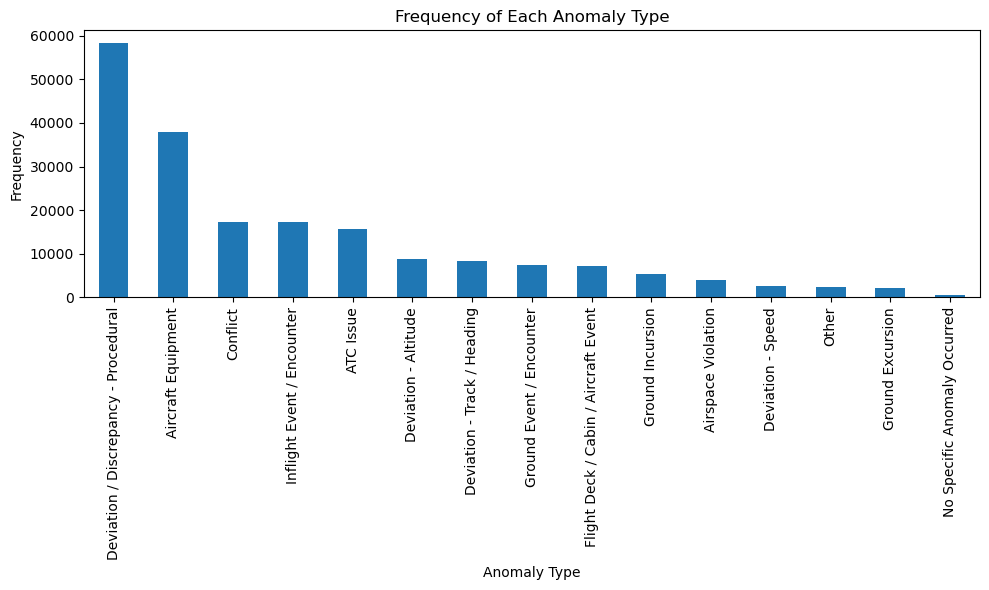

In [23]:
import matplotlib.pyplot as plt

# Sum each column to get the frequency of each anomaly type
anomaly_frequencies = binary_representation.sum()

# Sort the frequencies for better visualization
sorted_frequencies = anomaly_frequencies.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_frequencies.plot(kind='bar')
plt.title('Frequency of Each Anomaly Type')
plt.xlabel('Anomaly Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
# Count the number of occurrences of each anomaly
anomaly_counts = sorted_frequencies
anomaly_counts


Deviation / Discrepancy - Procedural    58337
Aircraft Equipment                      37932
Conflict                                17342
Inflight Event / Encounter              17203
ATC Issue                               15751
Deviation - Altitude                     8876
Deviation - Track / Heading              8279
Ground Event / Encounter                 7342
Flight Deck / Cabin / Aircraft Event     7147
Ground Incursion                         5249
Airspace Violation                       3997
Deviation - Speed                        2588
Other                                    2454
Ground Excursion                         2157
No Specific Anomaly Occurred              471
dtype: int64

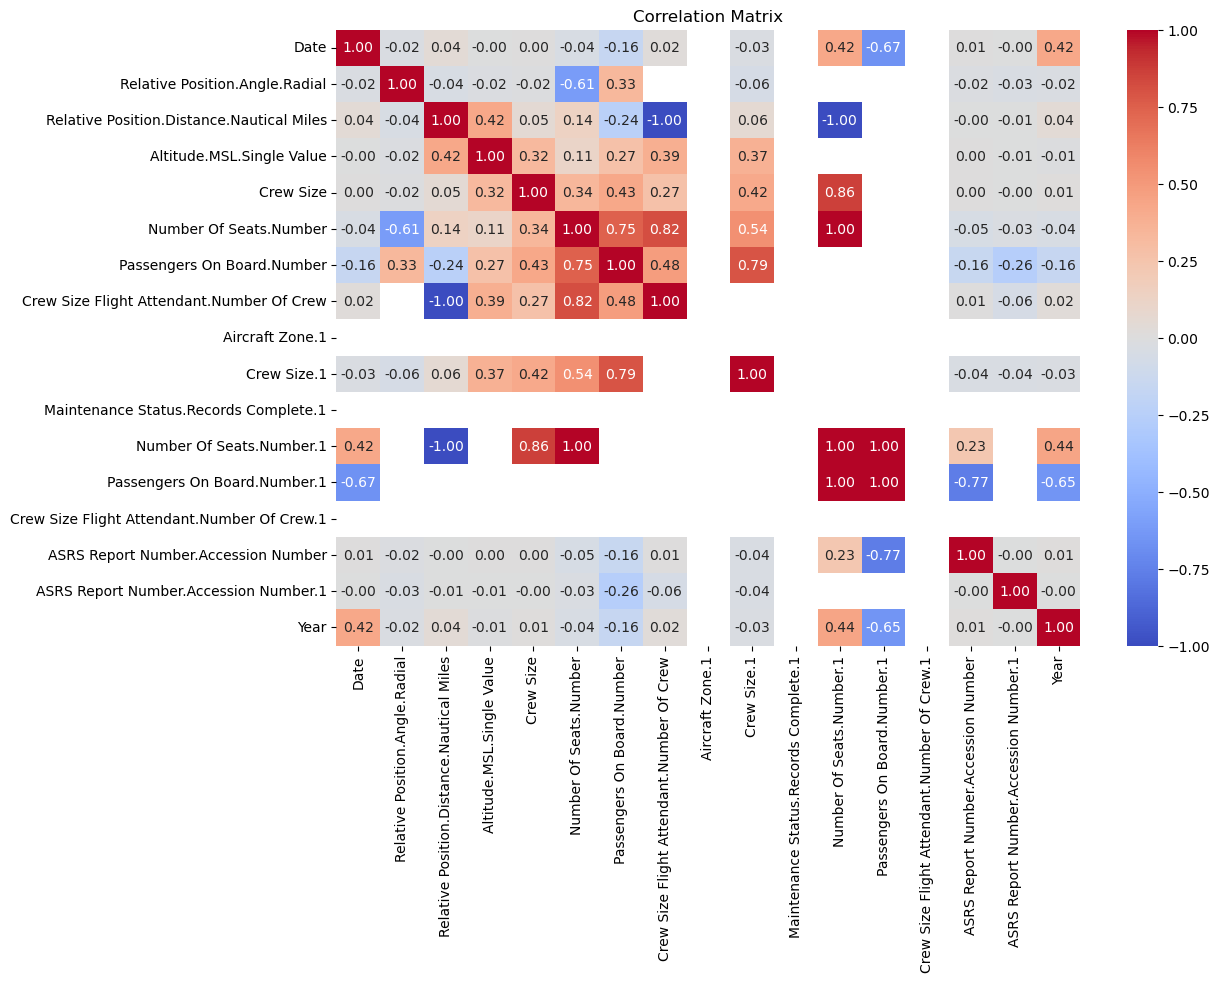

In [7]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr(min_periods=1)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
